<table style="width:100%">
    <tr>
        <td>
            <a href="http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Appendix_Illustrations/Reflection_recursion.html">
  <img src="../svg/view-html.svg" alt="Open In Colab"/>
            </a>
        </td>
        <td>
<a href="https://github.com/vvkisil/MoebInv-notebooks/blob/master/Appendix_Illustrations/Reflection_recursion.ipynb">
  <img src="../svg/open-github.svg" alt="Open In Colab"/>
            </a>
        </td>
        <td>
            <a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Appendix_Illustrations/Reflection_recursion.ipynb">
  <img src="../svg/exec-colab.svg" alt="Open In Colab"/>
            </a>
        </td>
        <td>
            <a href="https://codeocean.com/capsule/7952650/tree">
  <img src="../svg/code-ocean.svg" alt="Code Ocean"/>
            </a>
        </td>
    </tr>
 </table>

# Filling gaps recursively

First, we execute the cell, which downloads and installs all required software. Its execution can take a minute or two, but it is required only once per session. 

In [1]:
%%bash

# Execute this cell on Ubuntu only
if grep -e "ID=ubuntu" /etc/os-release ; then \
    echo 'Continue on Ubuntu' ; \
else \
    echo 'Does not look like an Ubuntu box, exiting' ; \
    exit ; \
fi

# Install signature key of the Ubuntu repository
curl -L https://sourceforge.net/projects/moebinv/files/binary/ubuntu/moebinv.gpg.key | apt-key add - 

# Add Ubuntu repository to known sources
echo 'deb https://sourceforge.net/projects/moebinv/files/binary/ubuntu bionic main' > \
     /etc/apt/sources.list.d/moebinv-bionic.list 

# Update the contents of the repository
apt update 

# Install required packages and their dependencies
apt-get  -q -y install asymptote python3-pymoebinv

# Copy useful initialisation file to the current directory
zcat /usr/share/doc/python3-pymoebinv/EPAL-v1/init_cycle.py.gz > init_cycle.py

Does not look like an Ubuntu box, exiting


First, we define a procedure which will make iterative reflections of a figure in the initial cycles.

In [2]:
def make_insertions(F, n : int):
    """The routine produces sequential reflection of the figure F
    in its all generation-0 cycles in a turn.
    n -- the number of reflections to perform.
    Since there is no predefined ordering for GiNaC object,
    every run of this routine can produce a different output."""

    # We are copying the figure to do not spoil the original with reflections.
    F0= figure(F)

    # All cycles at generation 0 a treated as mirrors
    for i in range(n):
        mirrors = F0.get_all_keys(i, i)
        Nm = len(mirrors)
        for k in range(Nm):
            for j in range(Nm):
                if j != k:
                    R=F0.add_cycle_rel([conjugation([mirrors[j],mirrors[k]])], f"R_{n}{k}{j}")
                    F0.set_asy_style(R, F0.get_asy_style(mirrors[j]))

    return figure(F0)

The simplicity of the above routine is possible due to advanced algorithms implemented in the library `figure`, which we are loading here.

In [3]:
from figure import *
# If you do not want to use additioanl IPython magic then comment the next line
%load_ext figure
from IPython.display import Image
show_asy_off()

Now we define a simple figure with only two cycles. We are adding a bit of colours to make illustration more vivid.

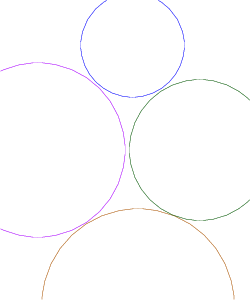

In [4]:
# We define a new figure with the following point and cycle metrics:
mir = figure()
mir.set_asy_style(mir.get_real_line(), "invisible")

# ## Cycles in generation 0
# The following cycles are defined by their coefficients
A = mir.add_cycle(cycle_data(1, matrix([[1.0, 0]]), -1), "A")
mir.set_asy_style(A, "rgb(0,0.333333,0)+solid+1pt")
B = mir.add_cycle(cycle_data(1, matrix([[-2.25, 0]]), 2), "B")
mir.set_asy_style(B, "rgb(0.666667,0,1)+solid+1pt")
C = mir.add_cycle(cycle_data(1, matrix([[-0.35, 2.1]]), 3.45), "C")
mir.set_asy_style(C, "rgb(0,0,1)+solid+1pt")
D = mir.add_cycle(cycle_data(1, matrix([[-0.24, -3.11]]), 6), "D")
mir.set_asy_style(D, "rgb(0.67,0.33,0)+solid+1pt")
%asy_write(mir, 300, -3, 2, -3, 3, "mirrors", "png", True, True, 0, "", True, False)

For visualisation we have used the IPython magic here defined by the `figure` package. Otherwise a pair of commands
```
#mir.asy_write(300, -3, 2, -3, 3, "mirrors", "png", True, True, 0, "", True, False)
#Image("mirrors.png")
```
will produce the same effect.

Let us see what are the repeated reflections in these two cycles. 

**Technical:** we have to supply the long list of parameters to the method `asy_write()` because we want that the very last one, which controls the appearance of cycles' labels, to be `False` (too many cycles after reflections, their labels will make the picture messy). The previous five parameters (all after the file format descriptor `"png"`) receive their default values. More attractive picture can be obtained in a longer time with the call `make_insertions(mir, 2)`.

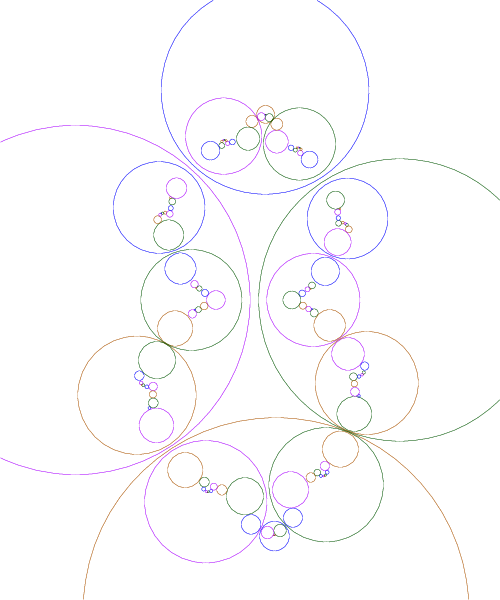

In [5]:
%asy_write(make_insertions(mir, 2), 600, -3, 2, -3, 3, "filling4", "png", True, True, 0, "", True, False)

We make a regular grid of circles.

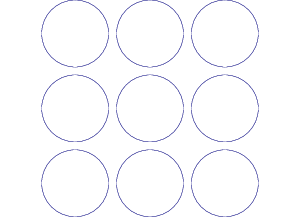

In [6]:
# We define a new figure with the following point and cycle metrics:
grid = figure()
grid.set_asy_style(grid.get_real_line(), "invisible")

# ## Cycles in generation 0
# The following cycles are defined by their coefficients, and can be defined in loops
#size = 2 # This value is already computationally expemsive
size = 1
for i in range(-size, size+1):
    for j in range(-size, size+1):
        grid.add_cycle(cycle_data(1, [i, j], -.2+i*i+j*j), f"C{i}{j}")
%asy_write(grid, 300, -2, 2, -2, 2, "grid", "png", True, True, 0, "", True, False)

Calculation of it filling takes a while (10-30 mins for `steps = 2`) due to exponential growth of the data.

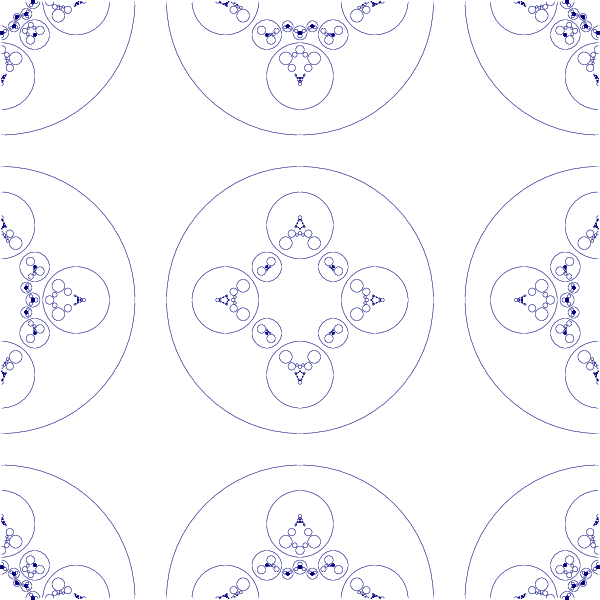

In [7]:
%asy_write(make_insertions(grid, 2), 600, -1, 1, -1, 1, "grid2", "png", True, True, 0, "", True, False)

## Further info:
* [MoebInv library full documentation](https://sourceforge.net/projects/moebinv/files/docs/figure.pdf)
* [MoebInv Home page](http://moebinv.sourceforge.net/)
* [MoebInv  Notebooks](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md)
* [MoebInv CodeOcean capsule](https://codeocean.com/capsule/7952650/tree)